# Bias-Variance Tradeoff Pipeline
This notebook project demonstrates a complete machine learning pipeline to address underfitting and overfitting using polynomial regression and Ridge regularization.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
df = pd.read_csv("industrial_sensors.csv", sep=";", decimal=",")
X = df[["Temperature", "Pressure", "Vibration"]]
y = df["Efficiency (%)"]
X = X.fillna(X.mean())
y = y.fillna(y.mean())

In [36]:
print(df.head())
print(df.describe())
print(df.dtypes)

             Timestamp   Temperature     Vibration      Pressure  \
0  2024-01-01 20:52:00  7.794220e+15  4.355410e+15  3.285960e+15   
1  2024-01-04 06:04:00  7.718750e+15  1.461560e+16  2.152910e+16   
2  2024-01-02 04:51:00  7.211330e+15  3.267870e+16  2.944560e+16   
3  2024-01-04 07:02:00  6.745000e+15  1.528600e+15  1.974760e+16   
4  2024-01-04 03:21:00  9.143880e+14  1.623120e+15  3.118080e+16   

   Flow Rate (L/min)  Efficiency (%)  
0       3.917740e+15    9.109980e+14  
1       1.128360e+16    6.751600e+15  
2       2.526050e+15    9.439010e+15  
3       2.133060e+16    8.208230e+15  
4       3.184410e+15    8.322740e+15  
        Temperature     Vibration      Pressure  Flow Rate (L/min)  \
count  9.701000e+03  1.000000e+04  9.750000e+03       1.000000e+04   
mean   6.827154e+15  1.306295e+16  1.581495e+16       1.652085e+16   
std    4.441739e+15  1.267495e+16  1.167329e+16       1.478541e+16   
min    6.770110e+12  6.497260e+12  2.285750e+11       4.374470e+11   
25%    

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Underfitting: Linear Regression
underfit_model = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('linreg', LinearRegression())
])
underfit_model.fit(X_train_scaled, y_train)

# Overfitting: Polynomial Regression (degree=10)
overfit_model = Pipeline([
    ('poly', PolynomialFeatures(degree=10)),
    ('linreg', LinearRegression())
])
overfit_model.fit(X_train_scaled, y_train)

# Regularization: Polynomial + Ridge
reg_model = Pipeline([
    ('poly', PolynomialFeatures(degree=10)),
    ('ridge', Ridge(alpha=10))
])
reg_model.fit(X_train_scaled, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('poly', ...), ('ridge', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",10
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",True
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",10
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True


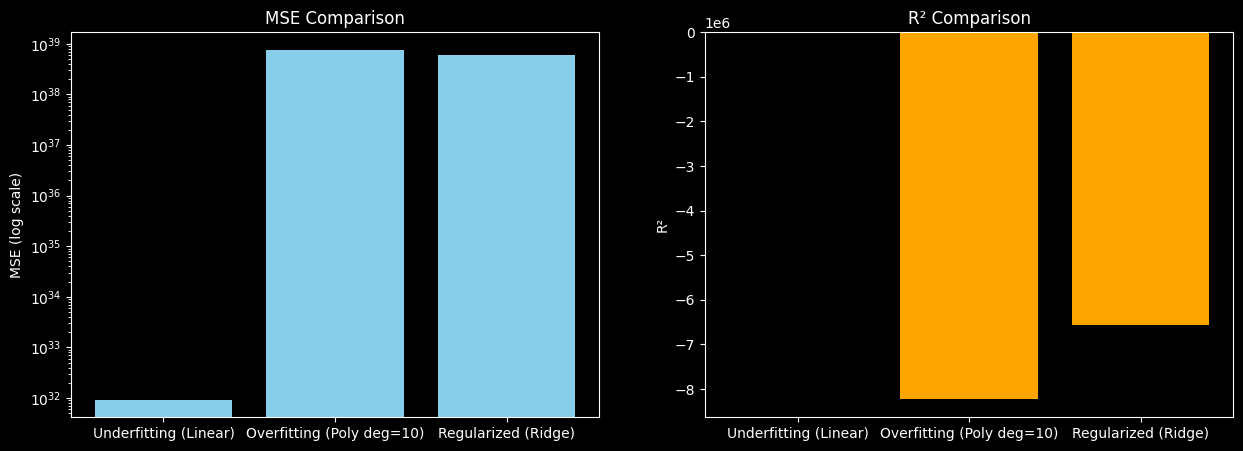

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].bar(labels, mse_values, color="skyblue")
axes[0].set_title("MSE Comparison")
axes[0].set_ylabel("MSE (log scale)")
axes[0].set_yscale("log")

axes[1].bar(labels, r2_values, color="orange")
axes[1].set_title("R² Comparison")
axes[1].set_ylabel("R²")
plt.show()

In [47]:
models = {
    "Underfitting (Linear)": underfit_model,
    "Overfitting (Poly deg=10)": overfit_model,
    "Regularized (Ridge)": reg_model
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} -> MSE: {mse:.2f}, R2: {r2:.2f}")

Underfitting (Linear) -> MSE: 92664969569556096870708750057472.00, R2: -0.00
Overfitting (Poly deg=10) -> MSE: 760965773689242359224826354724899913728.00, R2: -8223368.40
Regularized (Ridge) -> MSE: 606510286773820943738321690338841853952.00, R2: -6554246.65


## Comparison and Conclusions
- **Underfitting (Linear):** Very simple model, does not capture the relationship between sensors and efficiency well.
- **Overfitting (Poly deg=10):** Very complex model, adjusts noise and loses generalization.
- **Regularized (Ridge):** Balanced model, reduces variance and improves generalization.

Regularization is essential to find the balance between bias and variance.